<a href="https://colab.research.google.com/github/anshkaggarwal22/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression From Scratch using Gradient Descent

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Text(0.5, 1.0, 'Households vs. Population')

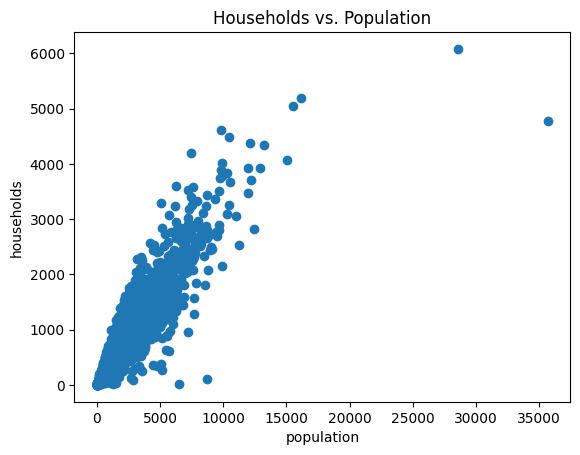

In [ ]:
population = df['population']

households = df['households']

plt.scatter(population, households)
plt.xlabel('population')
plt.ylabel('households')
plt.title('Households vs. Population')

In [ ]:
# calculate the mean squared error
def mean_squared_error(b0, b1, feature_col, target_col, df):
  se = 0
  n = len(df)
  for i in range(n):
    x_i = df.iloc[i][feature_col]
    y_i = df.iloc[i][target_col]

    y_pred = b0 + b1 * x_i

    se += (y_i - y_pred) ** 2 # squared error formula

  mse = se / n # mean squared error formula
  return mse

# Full batch Gradient Descent operation for one epoch
def gradient_descent(b0_curr, b1_curr, learning_rate, feature_col, target_col, df):
  b0_gradient = 0
  b1_gradient = 0
  n = len(df)

  for i in range(n):
    x_i = df.iloc[i][feature_col]
    y_i = df.iloc[i][target_col]

    y_pred = b0_curr + b1_curr * x_i

    b0_gradient += -(2/n) * (y_i - y_pred) # partial derivative calculation
    b1_gradient += -(2/n) * x_i * (y_i - y_pred)

  b0 = b0_curr - (learning_rate * b0_gradient) # step in the direction of greatest initial decrease
  b1 = b1_curr - (learning_rate * b1_gradient)

  return b0, b1


# -----------------------------------------
# Rewrite both functions using NumPy

import numpy as np

def mean_squared_error_numpy(b0, b1, feature_col, target_col, df):
  x = df[feature_col].values
  y = df[target_col].values

  y_pred = b0 + b1 * x

  mse = np.mean((y - y_pred) ** 2)

  return mse

def gradient_descent_numpy(b0_curr, b1_curr, learning_rate, feature_col, target_col, df):
  n = len(df)
  x = df[feature_col].values
  y = df[target_col].values

  y_pred = b0_curr + b1_curr * x

  b0_gradient = -(2/n) * np.sum(y - y_pred)
  b1_gradient = -(2/n) * np.sum((y - y_pred) * x)

  b0 = b0_curr - (learning_rate * b0_gradient)
  b1 = b1_curr - (learning_rate * b1_gradient)

  return b0, b1

In [ ]:
b0 = 0
b1 = 0
learning_rate = .0000001 # Got through trial and error
epochs = 100

for i in range(epochs):
  b0, b1 = gradient_descent_numpy(b0, b1, learning_rate, 'population', 'households', df)

  mse = mean_squared_error_numpy(b0, b1, 'population', 'households', df)

  if i % 10 == 0:
        print(f"Epoch {i}, MSE: {mse}, b0: {b0}, b1: {b1}")

print(f"Final Parameters: b0 = {b0}, b1 = {b1}")
print(f"y = {b0} + {b1} * x")

Epoch 0, MSE: 67252.14342923762, b0: 0.00010024438823529412, b1: 0.22356548754117647
Epoch 10, MSE: 27314.15407234581, b0: 0.00019818033049183738, b1: 0.3325692346557761
Epoch 20, MSE: 27314.15140425005, b0: 0.00024975537886441526, b1: 0.33257077255067397
Epoch 30, MSE: 27314.148744336657, b0: 0.0003013297233873453, b1: 0.33257075063737873
Epoch 40, MSE: 27314.146084427437, b0: 0.00035290402746927774, b1: 0.33257072870178006
Epoch 50, MSE: 27314.143424522394, b0: 0.0004044782911197377, b1: 0.33257070676619827
Epoch 60, MSE: 27314.140764621516, b0: 0.0004560525143387569, b1: 0.3325706848306336
Epoch 70, MSE: 27314.13810472481, b0: 0.000507626697126367, b1: 0.3325706628950862
Epoch 80, MSE: 27314.135444832275, b0: 0.0005592008394825997, b1: 0.33257064095955596
Epoch 90, MSE: 27314.132784943904, b0: 0.0006107749414074869, b1: 0.33257061902404295
Final Parameters: b0 = 0.0006571915985711111, b1 = 0.33257059928209587
y = 0.0006571915985711111 + 0.33257059928209587 * x


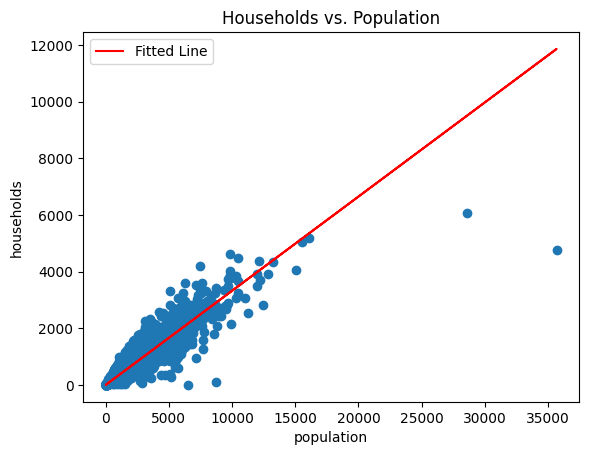

In [ ]:
plt.scatter(population, households)

df['predicted'] = b0 + b1 * df['population']
plt.plot(df['population'], df['predicted'], color='red', label='Fitted Line')

plt.xlabel('population')
plt.ylabel('households')
plt.title('Households vs. Population')
plt.legend()
plt.show()

Not bad, the error is definitley reduced and the line looks pretty good, but the other solutions reduce the error a bit more. Maybe we are at a local minima? We can try and fix this by changing our starting points or trying mini-batch gradient descent to add some randomness and reach the global minima.

# Linear Regression From Scratch using the Normal Equation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# B = (X^T X)^-1 X^T y

def normal_equation(feature_col, target_col, df):
  X = df[[feature_col]].values
  X = np.c_[np.ones(X.shape[0]), X] # Need the first column to be ones to match the intercept and correctly model the linear equation
  y = df[target_col].values

  params, _, _, _ = np.linalg.lstsq(X, y, rcond=None) # more stable then doing np.linalg.inv
  return params

def mean_squared_error_numpy(b0, b1, feature_col, target_col, df):
  x = df[feature_col].values
  y = df[target_col].values

  y_pred = b0 + b1 * x

  mse = np.mean((y - y_pred) ** 2)

  return mse

In [ ]:
params_normal = normal_equation('population', 'households', df)
b0 = params_normal[0]
b1 = params_normal[1]

mse = mean_squared_error_numpy(b0, b1, 'population', 'households', df)
print(f"Normal Equation Parameters: b0 = {b0}, b1 = {b1}")
print(f"MSE: {mse}")

Normal Equation Parameters: b0 = 65.78837883966077, b1 = 0.3045897450945903
MSE: 25617.66068173508


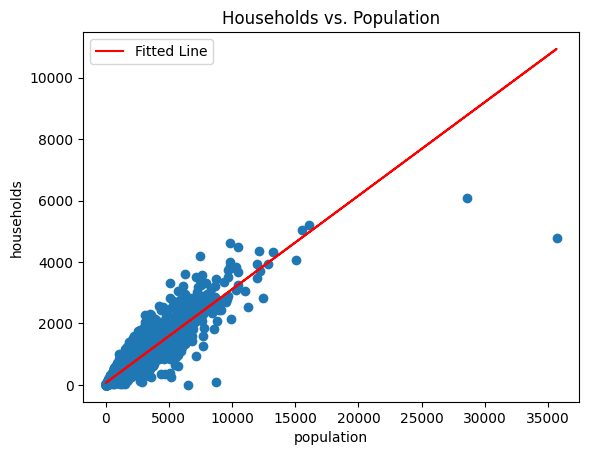

In [ ]:
plt.scatter(df['population'], df['households'])

df['predicted'] = b0 + b1 * df['population']
plt.plot(df['population'], df['predicted'], color='red', label='Fitted Line')

plt.xlabel('population')
plt.ylabel('households')
plt.title('Households vs. Population')
plt.legend()
plt.show()

The closed form reduced the error more than the iterative solution, however the closed form solution might start to become to slow once dataset size increase or more parameters are added.

# Linear Regression using the Scikit-learn Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
X = df[['population']]
y = df['households']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

b0 = model.intercept_
b1 = model.coef_[0]

print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")

print(f"Test Mean Squared Error: {mse}")


Intercept (b0): 72.58897850667068
Slope (b1): 0.2992217177952396
Test Mean Squared Error: 21183.85817809878


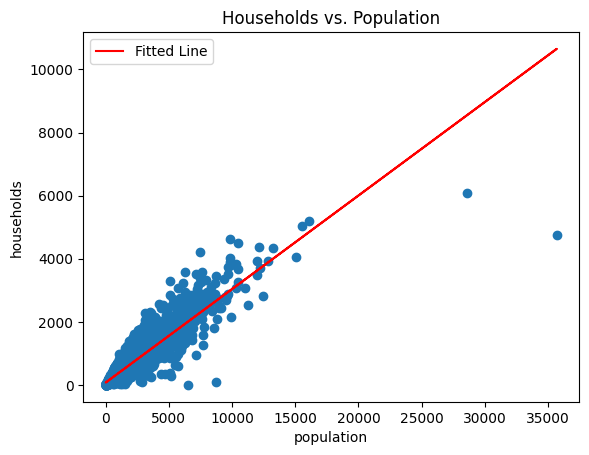

In [ ]:
plt.scatter(df['population'], df['households'])

df['predicted'] = b0 + b1 * df['population']
plt.plot(df['population'], df['predicted'], color='red', label='Fitted Line')

plt.xlabel('population')
plt.ylabel('households')
plt.title('Households vs. Population')
plt.legend()
plt.show()

Using the Scikit-learn library solution gives us the lowest MSE. However, it should give the same MSE as the closed form solution, but there is a chance for unstable calculations and therefore our solution written from scratch has a bit higher MSE. Regardless, use the library.

# Multiple Regression using the Scikit-learn Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

correlation_matrix = df.corr() # get the correlation of a single variable to all the others
print(correlation_matrix)

correlation_with_households = correlation_matrix['households'].sort_values(ascending=False) # focusing on households and want the highest correlations
print("\n\nCorrelation constants for households\n")
print(correlation_with_households)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_

In [ ]:
X = df[['population', 'total_bedrooms', 'total_rooms']]
y = df['households']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]
b3 = model.coef_[2]

print(f"Intercept (b0): {b0}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"b3: {b3}")


print(f"Test Mean Squared Error: {mse}")

Intercept (b0): 10.569734401790697
b1: 0.06678013786916245
b2: 0.7314002659430907
b3: 9.560741651748472e-05
Test Mean Squared Error: 3300.464904837913


We see that in Multiple Linear Regression when adding more parameters to our model, it can give us more accurate results in trying to predict the number of households as we can see the MSE is significantly smaller with 3 parameters than it is for the 1 parameter Linear Regression models as we had done previously. We used all the variables where the correlation constant was at least 0.90 . We can also do this using Gradient Descent and the Normal Equation, we would just need to account for more partial derivatives and add columns of data for each new feature in our X matrix for the Normal Equation.

# Polynomial Regression using the Scikit-learn Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Text(0.5, 1.0, 'Median Income vs. Median House Value')

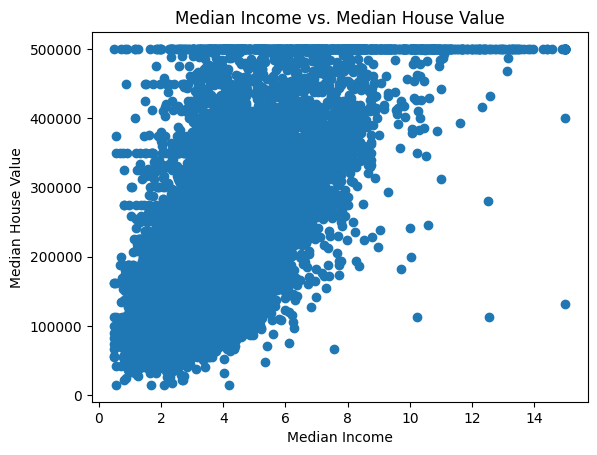

In [ ]:
median_income = df['median_income']

median_house_value = df['median_house_value']

plt.scatter(median_income, median_house_value)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')

In [ ]:
X = df[['median_income']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

linear_model = model.named_steps['linearregression']
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# Print the coefficients
print(f"Intercept (b_0): {intercept}")
print(f"Coefficients: {coefficients}")


print(f"Test Mean Squared Error: {mse}")

Intercept (b_0): 80077.14437624064
Coefficients: [    0.         12256.30515092  6471.87946071  -371.15606711]
Test Mean Squared Error: 6804202252.100605


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


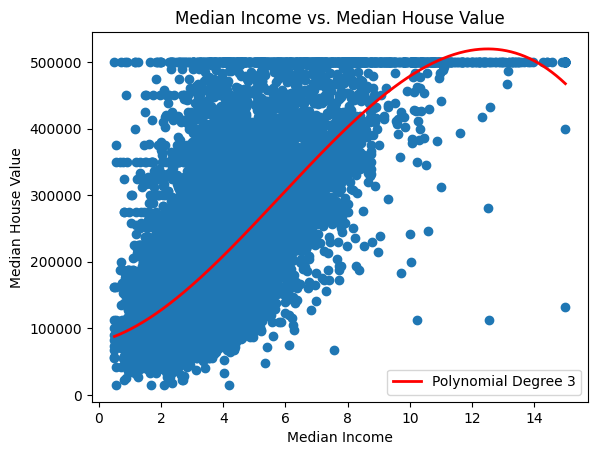

In [ ]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # 500 evenly spaced points and reshaped to satisfy scikit learn
y_range_pred = model.predict(X_range)

plt.scatter(median_income, median_house_value)

plt.plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Polynomial Degree {degree}')

plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

Obviously, this data does not have a polynomial relationship and we can tell that from the MSE, but if it did, we could try and use Polynomial Regression like above to try and fit the data precisely.